In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
!pip install probscale

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import probscale

stop_smoking = pd.read_csv("/content/drive/MyDrive/Datathon/stop_smoking.csv")
tobacco_use_ww = pd.read_csv("/content/drive/MyDrive/Datathon/tobacco_use_ww.csv")
tobacco_production = pd.read_csv("/content/drive/MyDrive/Datathon/tobacco_production.csv")
gdp = pd.read_csv("/content/drive/MyDrive/Datathon/economic_country_data.csv")
sales_per_day = pd.read_csv("/content/drive/MyDrive/Datathon/sales_per_day.csv")

In [121]:
countries3 = pd.unique(tobacco_production['Country or Area'])
countries2 = pd.unique(stop_smoking['Entity'])
countries = pd.unique(tobacco_use_ww['Location'])

In [124]:
tobacco_use_ww = tobacco_use_ww.rename(columns={'Value': 'Percentage'})

In [125]:
tobacco_use_ww['Location'] = tobacco_use_ww['Location'].apply(lambda x: 'United States' if x == "United States of America" else x)
tobacco_use_ww['Location'] = tobacco_use_ww['Location'].apply(lambda x: 'United Kingdom' if x == "United Kingdom of Great Britain and Northern Ireland" else x)
tobacco_production['Country or Area'] = tobacco_production['Country or Area'].apply(lambda x: 'United States' if x == "United States of America" else x)

In [126]:
enforce_bans = pd.DataFrame(columns=stop_smoking.columns)
enforce_bans = pd.concat([stop_smoking[(stop_smoking['Entity'] == country)] for country in countries])
enforce_bans

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
10,Azerbaijan,AZE,2012,1.75,19.8,4,3
11,Azerbaijan,AZE,2014,2.70,17.6,4,3
239,Azerbaijan,AZE,2007,NaN,NaN,4,2
240,Azerbaijan,AZE,2010,NaN,NaN,4,3
372,Eritrea,ERI,2007,NaN,NaN,5,2
...,...,...,...,...,...,...,...
311,Chile,CHL,2010,NaN,NaN,4,3
563,Nauru,NRU,2007,NaN,NaN,2,3
564,Nauru,NRU,2010,NaN,NaN,4,3
565,Nauru,NRU,2012,NaN,NaN,4,3


In [127]:
tobacco_prod = pd.DataFrame(columns = tobacco_production.columns)
tobacco_prod = pd.concat([tobacco_production[(tobacco_production['Country or Area'] == country)] for country in countries])
tobacco_prod

,Country or Area,Year,Unit,Value,Value Footnotes
30,Azerbaijan,2016,Metric tons,1946.900000,NaN
31,Azerbaijan,2016,Mil. USD,7.457441,NaN
32,Azerbaijan,2015,Metric tons,1691.500000,NaN
33,Azerbaijan,2015,Mil. USD,6.929778,NaN
34,Azerbaijan,2014,Metric tons,2430.200000,NaN
...,...,...,...,...,...
964,Serbia,2010,Metric tons,4952.000000,NaN
965,Serbia,2009,Metric tons,4197.000000,NaN
966,Serbia,2008,Metric tons,4769.000000,NaN
967,Serbia,2007,Metric tons,3822.000000,NaN


In [128]:
merged = pd.merge(tobacco_use_ww, enforce_bans, left_on=['Location','Year'], right_on=['Entity','Year'])
merged = pd.merge(merged, tobacco_prod, left_on=['Location', 'Year'], right_on=['Country or Area', 'Year'])
gdp_proportion = pd.merge(tobacco_use_ww, gdp, left_on='Location', right_on='Country Name')


In [130]:
series = pd.Series([year for year in gdp_proportion['Year']])
series = pd.unique(series)
series = [str(year) for year in series]
series.append(('Percentage'))
series.append('Year')
series.append('Gender')
series.append('Location')
print(series)

['2018', '2017', '2016', '2015', '2014', '2013', '2010', '2005', '2000', 'Percentage', 'Year', 'Gender', 'Location']


In [131]:
corresponding_years = gdp_proportion[(gdp_proportion['Gender'] == 'Both sexes')][series]

In [132]:
X = []
y = []
year_of_data = []
country_of_data = []
for year in pd.unique(corresponding_years['Year']):
  X.append(corresponding_years[corresponding_years['Year'] == year][str(year)])
  y.append(corresponding_years[corresponding_years['Year'] == year]['Percentage'])
  year_of_data.append(year)
  country_of_data.append(corresponding_years[corresponding_years['Year'] == year]['Location'])


In [134]:
x_merged = pd.Series(dtype= 'float64')
y_merged = pd.Series(dtype= 'float64')
year_of_data2 = []
country_of_data2 = []
for index in enumerate(X):
  x_merged = x_merged.append(X[index[0]])
  y_merged = y_merged.append(y[index[0]])
  for i in range(len(X[index[0]])):
    year_of_data2.append(year_of_data[index[0]])
    country_of_data2.append(country_of_data[index[0]].iloc[i])

In [204]:
df = pd.DataFrame(dict(GDP = x_merged, Percentage = y_merged, Year = year_of_data2, Location = country_of_data2))
df

,GDP,Percentage,Year,Location
1,4.711294e+10,19.6,2018,Azerbaijan
29,NaN,7.2,2018,Eritrea
55,6.531596e+10,3.7,2018,Ghana
82,3.971905e+11,4.8,2018,Nigeria
110,7.978877e+10,9.6,2018,Oman
...,...,...,...,...
3481,1.726036e+10,44.1,2000,Lebanon
3508,1.650210e+11,41.8,2000,Indonesia
3535,6.875846e+09,45.9,2000,Serbia
3562,7.786093e+10,53.4,2000,Chile


Text(0.5, 1.0, 'GDP vs Percentage of Population of Both Sexes who smoke between 2000-2018 of All Countries')

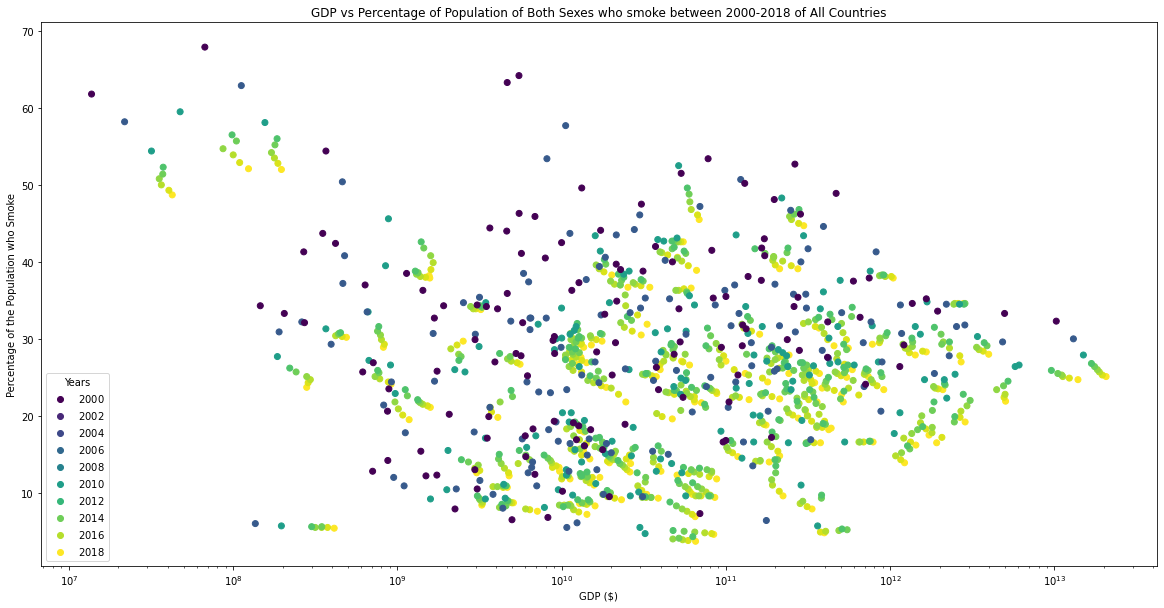

In [205]:
scatter = plt.scatter(df['GDP'],df['Percentage'], c = df['Year'])
plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Years")
scatter.figure.set_size_inches(20,10)
plt.xscale('log')
plt.xlabel('GDP ($)')
plt.ylabel('Percentage of the Population who Smoke')
plt.title('GDP vs Percentage of Population of Both Sexes who smoke between 2000-2018 of All Countries')

In [287]:
max_percentage = np.max((gdp_proportion['Percentage']))
max_percentage

91.0

In [207]:
gdp_proportion[gdp_proportion['Percentage'] == 91.0]

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Percentage,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
755,SEAR,South-East Asia,TLS,Timor-Leste,2000,Male,91.0,Timor-Leste,TLS,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367087900.0,477457500.0,469461100.0,490400300.0,440732900.0,462261800.0,453796000.0,542795300.0,648492700.0,726881600.0,881826900.0,1.054725e+09,1.147780e+09,1.395525e+09,1.447311e+09,1.594411e+09,1.650609e+09,1.599338e+09,1.559895e+09,2.017925e+09,1.821000e+09


In [208]:
# 'Timor-Leste' has the highest percentage of smokers
models = {}
for country in pd.unique(df['Location']):
  lm = LinearRegression()
  lm.fit(np.array(df[df['Location'] == country]['Year']).reshape(-1,1), np.array(df[df['Location'] == country]['Percentage']).reshape(-1,1))
  models[country] = lm

In [210]:
positive_models = []
max_coef = 1000
max_country = ""
coefficients = []
constants = []
greatest_decrease = []
positive_countries = []
for country in models:
  coefficients.append(float(models[country].coef_[0]))
  constants.append(float(models[country].intercept_[0]))
  if(models[country].coef_ < max_coef):
    max_coef = models[country].coef_
    max_country = country
  if((models[country].coef_ >= 0) or (float(df[(df['Location'] == country) & (df['Year'] == 2018)]['Percentage']) >= float(df[(df['Location'] == country) & (df['Year'] == 2000)]['Percentage']))):
    positive_countries.append(country)
    positive_models.append(models[country])

In [211]:
positive_countries

['Oman', 'Niger', 'Portugal', 'Lesotho', 'France', 'Croatia']

In [212]:
print("Mean of the coefficients of the Linear Models based off of each country: " + str(np.mean(coefficients)))
print("Mean of the intercepts of the linear models based off of each country: " + str(np.mean(constants)))

Mean of the coefficients of the Linear Models based off of each country: -0.5027412280701753
Mean of the intercepts of the linear models based off of each country: 1036.483521303258


In [213]:
print("STD of the coefficients of the Linear Models based off of each country: " + str(np.std(coefficients)))
print("STD of the intercepts of the linear models based off of each country: " + str(np.std(constants)))

STD of the coefficients of the Linear Models based off of each country: 0.3694868075412506
STD of the intercepts of the linear models based off of each country: 746.9692585747047


In [214]:
print("Max of the coefficients of the Linear Models based off of each country: " + str(np.max(coefficients)))
print("Max of the intercepts of the linear models based off of each country: " + str(np.max(constants)))

Max of the coefficients of the Linear Models based off of each country: 0.3475694444444443
Max of the intercepts of the linear models based off of each country: 3655.880555555555


In [215]:
print("Min of the coefficients of the Linear Models based off of each country: " + str(np.min(coefficients)))
print("Min of the intercepts of the linear models based off of each country: " + str(np.min(constants)))

Min of the coefficients of the Linear Models based off of each country: -1.7965277777777775
Min of the intercepts of the linear models based off of each country: -672.1430555555553


In [216]:
print("Mean of the coefficients of the Linear Models based off of each country: " + str(np.median(coefficients)))
print("Mean of the intercepts of the linear models based off of each country: " + str(np.median(constants)))

Mean of the coefficients of the Linear Models based off of each country: -0.46041666666666664
Mean of the intercepts of the linear models based off of each country: 939.3013888888886


(array([ 1.,  0.,  8.,  8., 17., 20., 35., 33.,  9.,  2.]),
 array([-1.79652778, -1.58211806, -1.36770833, -1.15329861, -0.93888889,
        -0.72447917, -0.51006944, -0.29565972, -0.08125   ,  0.13315972,
         0.34756944]),
 <a list of 10 Patch objects>)

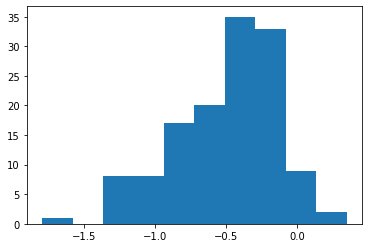

In [217]:
plt.hist(coefficients)

(array([ 2., 11., 32., 34., 20., 18.,  7.,  8.,  0.,  1.]),
 array([-672.14305556, -239.34069444,  193.46166667,  626.26402778,
        1059.06638889, 1491.86875   , 1924.67111111, 2357.47347222,
        2790.27583333, 3223.07819444, 3655.88055556]),
 <a list of 10 Patch objects>)

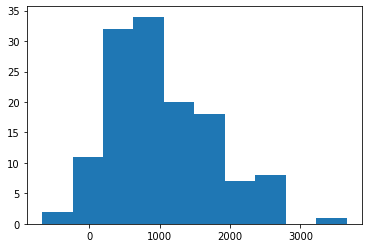

In [218]:
plt.hist(constants)

In [219]:
mean_coef = np.mean(coefficients)
std_coef = np.std(coefficients)
normalize_coefficients = [(coefficient-mean_coef)/std_coef for coefficient in coefficients]
mean_int = np.mean(constants)
std_int = np.std(constants)
normalize_constants = [(intercept-mean_int)/std_int for intercept in constants]

Text(0.5, 1.0, 'Histogram of Normalized Coefficients for the Linear Models')

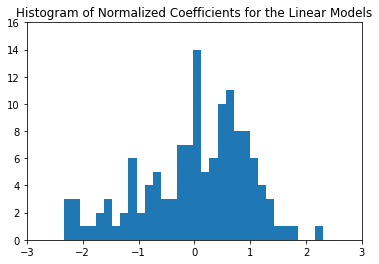

In [220]:
plt.hist(normalize_coefficients, bins= 40)
plt.ylim([0, 16])
plt.xlim([-3,3])
plt.title("Histogram of Normalized Coefficients for the Linear Models")

Text(0.5, 1.0, 'Histogram of Normalized Intercepts for the Linear Models')

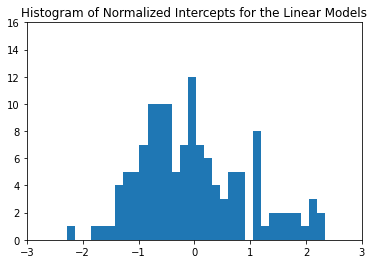

In [221]:
plt.hist(normalize_constants, bins = 40)
plt.ylim([0,16])
plt.xlim([-3,3])
plt.title("Histogram of Normalized Intercepts for the Linear Models")

In [223]:
positive_countries

['Oman', 'Niger', 'Portugal', 'Lesotho', 'France', 'Croatia']

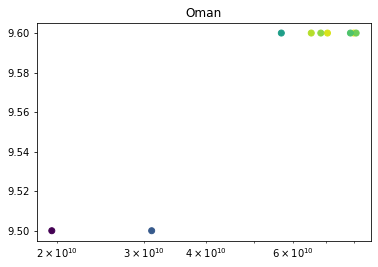

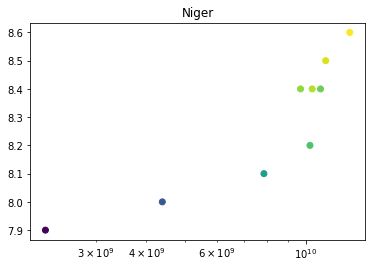

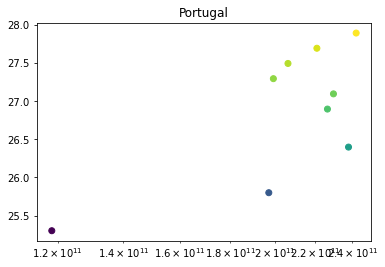

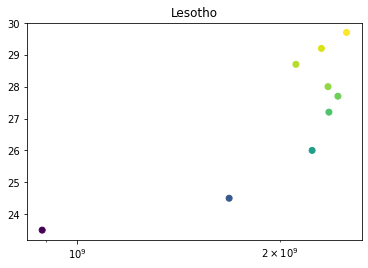

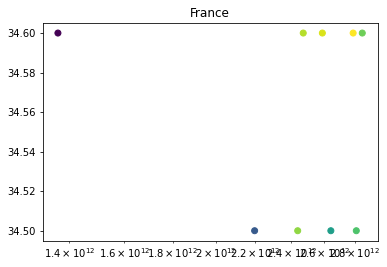

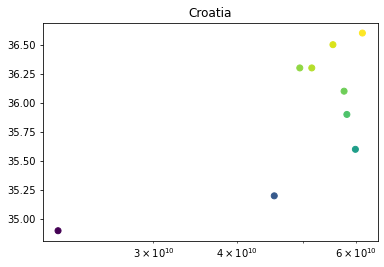

In [224]:
for country in positive_countries:
  scatter = plt.scatter(df[df['Location'] == country]['GDP'], df[df['Location'] == country]['Percentage'], c=df[df['Location'] == country]['Year'])
  plt.xscale('log')
  #plt.legend(*scatter.legend_elements(),
  #                  loc="lower left", title="Years")
  plt.title(country)
  plt.show()


In [225]:
country_stop_smoking = {}
for country in positive_countries:
  country_stop_smoking[country] = stop_smoking[stop_smoking['Entity'] == country]['EnforceBansTobaccoAd']

In [226]:
country_stop_smoking

{'Croatia': 43     4
 44     4
 334    4
 335    4
 Name: EnforceBansTobaccoAd, dtype: int64, 'France': 64     4
 65     4
 389    4
 390    4
 Name: EnforceBansTobaccoAd, dtype: int64, 'Lesotho': 483    2
 484    2
 485    2
 486    2
 Name: EnforceBansTobaccoAd, dtype: int64, 'Niger': 576    5
 577    5
 578    5
 579    5
 Name: EnforceBansTobaccoAd, dtype: int64, 'Oman': 133    2
 134    2
 595    2
 596    2
 Name: EnforceBansTobaccoAd, dtype: int64, 'Portugal': 145    4
 146    4
 619    4
 620    4
 Name: EnforceBansTobaccoAd, dtype: int64}

In [227]:
#Run this once!
#df = pd.merge(df, sales_per_day, left_on=['Location', 'Year'], right_on=['Entity', 'Year'])

In [228]:
df

,GDP,Percentage,Year,Location,Entity,Code,amt
0,4.444931e+12,23.4,2015,Japan,Japan,JPN,4.6
1,1.751721e+10,15.7,2015,Iceland,Iceland,ISL,2.2
2,3.356236e+12,28.9,2015,Germany,Germany,DEU,4.2
3,4.896994e+12,23.9,2014,Japan,Japan,JPN,4.5
4,1.786766e+10,16.4,2014,Iceland,Iceland,ISL,2.3
...,...,...,...,...,...,...,...
111,2.628355e+11,52.7,2000,Sweden,Sweden,SWE,2.9
112,1.301338e+11,50.2,2000,Greece,Greece,GRC,9.9
113,1.362249e+12,34.6,2000,France,France,FRA,5.1
114,1.324583e+10,49.6,2000,Bulgaria,Bulgaria,BGR,7.6


In [229]:
positive_sales_countries = {}
for country in positive_countries:
  positive_sales_countries[country] = (df[df['Location'] == country]['amt'])

In [230]:
(positive_sales_countries)

{'Croatia': 26     4.7
 53     4.9
 82     5.4
 115    6.4
 Name: amt, dtype: float64, 'France': 51     3.5
 81     3.5
 113    5.1
 Name: amt, dtype: float64, 'Lesotho': Series([], Name: amt, dtype: float64), 'Niger': Series([], Name: amt, dtype: float64), 'Oman': Series([], Name: amt, dtype: float64), 'Portugal': 43     3.9
 71     4.9
 101    5.4
 Name: amt, dtype: float64}

4.899137918291421
4.800000190734863
1.4613701213842178


(array([10., 17., 27., 27., 14., 15.,  3.,  1.,  0.,  2.]),
 array([ 2.20000005,  3.02      ,  3.83999996,  4.65999992,  5.47999988,
         6.29999983,  7.11999979,  7.93999975,  8.7599997 ,  9.57999966,
        10.39999962]),
 <a list of 10 Patch objects>)

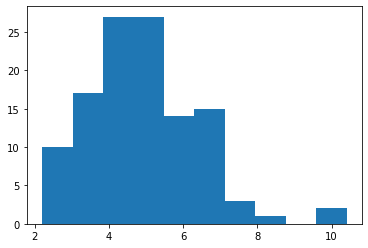

In [231]:
print(np.mean(df['amt']))
print(np.median(df['amt']))
print(np.std(df['amt']))
plt.hist(df['amt'])

In [232]:
df[np.abs(df['amt'] - 10) <= 1]

,GDP,Percentage,Year,Location,Entity,Code,amt
80,2.477830e+11,46.7,2005,Greece,Greece,GRC,10.4
112,1.301338e+11,50.2,2000,Greece,Greece,GRC,9.9


In [233]:
#Run this once!
#df = pd.merge(df, tobacco_prod, left_on=['Location', 'Year'], right_on=['Country or Area', 'Year'])


In [234]:
df

,GDP,Percentage,Year,Location,Entity,Code,amt,Country or Area,Unit,Value,Value Footnotes
0,4.444931e+12,23.4,2015,Japan,Japan,JPN,4.6,Japan,Metric tons,3.000000,NaN
1,4.444931e+12,23.4,2015,Japan,Japan,JPN,4.6,Japan,Mil. USD,0.165229,NaN
2,3.356236e+12,28.9,2015,Germany,Germany,DEU,4.2,Germany,Metric tons,52863.556000,NaN
3,4.896994e+12,23.9,2014,Japan,Japan,JPN,4.5,Japan,Metric tons,3.000000,8
4,4.896994e+12,23.9,2014,Japan,Japan,JPN,4.5,Japan,Mil. USD,1.887776,8
...,...,...,...,...,...,...,...,...,...,...,...
83,1.301338e+11,50.2,2000,Greece,Greece,GRC,9.9,Greece,Mil. USD,13.810963,6
84,1.362249e+12,34.6,2000,France,France,FRA,5.1,France,Metric tons,4155.000000,NaN
85,1.362249e+12,34.6,2000,France,France,FRA,5.1,France,Mil. USD,47.908568,NaN
86,1.324583e+10,49.6,2000,Bulgaria,Bulgaria,BGR,7.6,Bulgaria,Metric tons,31263.000000,NaN


In [246]:
print(np.mean(df[df['Unit'] == 'Metric tons']['Value']))
np.std(df[df['Unit'] == 'Metric tons']['Value'])

10485.892666666667


14850.669920744656

In [240]:
positive_countries_production = {}
for country in positive_countries:
  positive_countries_production[country] = str((df[df['Location'] == country]['Value'])) + " " + str(df[df['Location'] == country]['Unit'])

In [242]:
positive_countries_production['Croatia']

'22     9335.0\n37    12529.0\n59    11843.0\nName: Value, dtype: float64 22    Metric tons\n37    Metric tons\n59    Metric tons\nName: Unit, dtype: object'

In [259]:
positive_countries_df = df[(df['Location'] == 'Croatia') | (df['Location'] == 'Lesotho') | (df['Location'] == 'France') | (df['Location'] == 'Niger') | (df['Location'] == 'Oman') | (df['Location'] == 'Portugal')]

In [260]:
positive_countries_df

,GDP,Percentage,Year,Location,Entity,Code,amt,Country or Area,Unit,Value,Value Footnotes
22,5.819407e+10,35.9,2013,Croatia,Croatia,HRV,4.7,Croatia,Metric tons,9335.000000,NaN
31,2.378809e+11,26.4,2010,Portugal,Portugal,PRT,3.9,Portugal,Metric tons,13661.548000,NaN
32,2.378809e+11,26.4,2010,Portugal,Portugal,PRT,3.9,Portugal,Mil. USD,95.853955,NaN
37,5.991831e+10,35.6,2010,Croatia,Croatia,HRV,4.9,Croatia,Metric tons,12529.000000,NaN
51,1.971803e+11,25.8,2005,Portugal,Portugal,PRT,4.9,Portugal,Metric tons,10.029000,NaN
52,1.971803e+11,25.8,2005,Portugal,Portugal,PRT,4.9,Portugal,Mil. USD,0.202674,NaN
57,2.196126e+12,34.5,2005,France,France,FRA,3.5,France,Metric tons,3400.000000,NaN
58,2.196126e+12,34.5,2005,France,France,FRA,3.5,France,Mil. USD,80.833706,NaN
59,4.537674e+10,35.2,2005,Croatia,Croatia,HRV,5.4,Croatia,Metric tons,11843.000000,NaN
73,1.183107e+11,25.3,2000,Portugal,Portugal,PRT,5.4,Portugal,Metric tons,13.567000,NaN


In [261]:
print(np.mean(df[df['Unit'] == 'Mil. USD']['Value']))
np.std(df[df['Unit'] == 'Mil. USD']['Value'])

82.94046158251116


134.44115632980856

In [262]:
enforce_bans

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
10,Azerbaijan,AZE,2012,1.75,19.8,4,3
11,Azerbaijan,AZE,2014,2.70,17.6,4,3
239,Azerbaijan,AZE,2007,NaN,NaN,4,2
240,Azerbaijan,AZE,2010,NaN,NaN,4,3
372,Eritrea,ERI,2007,NaN,NaN,5,2
...,...,...,...,...,...,...,...
311,Chile,CHL,2010,NaN,NaN,4,3
563,Nauru,NRU,2007,NaN,NaN,2,3
564,Nauru,NRU,2010,NaN,NaN,4,3
565,Nauru,NRU,2012,NaN,NaN,4,3


In [266]:
#df = pd.merge(df, enforce_bans, left_on=['Entity', 'Year'], right_on=['Entity', 'Year'])

In [276]:
(enforce_bans[(enforce_bans['Entity'] == 'Croatia') | (enforce_bans['Entity'] == 'Lesotho') | (enforce_bans['Entity'] == 'France') | (enforce_bans['Entity'] == 'Niger') | (enforce_bans['Entity'] == 'Oman') | (enforce_bans['Entity'] == 'Portugal')])

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
133,Oman,OMN,2012,2.60,22.1,2,3
134,Oman,OMN,2014,2.86,22.1,2,4
595,Oman,OMN,2007,NaN,NaN,2,3
596,Oman,OMN,2010,NaN,NaN,2,3
576,Niger,NER,2007,NaN,NaN,5,3
577,Niger,NER,2010,NaN,NaN,5,3
578,Niger,NER,2012,NaN,NaN,5,3
579,Niger,NER,2014,NaN,NaN,5,3
145,Portugal,PRT,2012,6.07,76.3,4,4
146,Portugal,PRT,2014,5.93,79.6,4,4


In [277]:
enforce_bans.dropna(axis=0)

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
10,Azerbaijan,AZE,2012,1.75,19.8,4,3
11,Azerbaijan,AZE,2014,2.70,17.6,4,3
55,Egypt,EGY,2012,2.29,71.5,4,4
56,Egypt,EGY,2014,2.69,72.0,4,4
71,Ghana,GHA,2012,2.35,23.1,5,4
...,...,...,...,...,...,...,...
86,Indonesia,IDN,2014,2.68,50.8,2,3
157,Serbia,SRB,2012,3.25,75.4,4,4
158,Serbia,SRB,2014,4.48,73.8,4,4
35,Chile,CHL,2012,3.69,82.0,4,3


In [280]:
enforce_bans[(enforce_bans['Entity'] == 'Croatia') | (enforce_bans['Entity'] == 'Lesotho') | (enforce_bans['Entity'] == 'France') | (enforce_bans['Entity'] == 'Niger') | (enforce_bans['Entity'] == 'Oman') | (enforce_bans['Entity'] == 'Portugal')].dropna(axis=0)

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
133,Oman,OMN,2012,2.60,22.1,2,3
134,Oman,OMN,2014,2.86,22.1,2,4
145,Portugal,PRT,2012,6.07,76.3,4,4
146,Portugal,PRT,2014,5.93,79.6,4,4
64,France,FRA,2012,6.69,80.0,4,4
65,France,FRA,2014,7.61,80.6,4,4
43,Croatia,HRV,2012,4.81,70.4,4,4
44,Croatia,HRV,2014,5.65,74.8,4,4


In [297]:
print(np.mean(enforce_bans['AvgCigarettePriceDollars']))
np.std(enforce_bans['AvgCigarettePriceDollars'])


4.385722222222224


2.5421546046514596

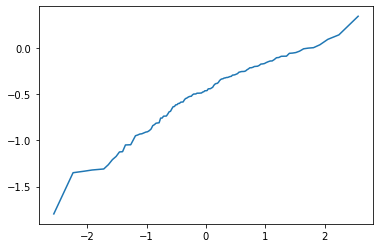

In [308]:
X = stats.probplot(coefficients)
plt.plot(X[0][0], X[0][1])

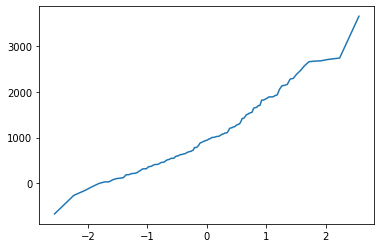

In [309]:
X = stats.probplot(constants)
plt.plot(X[0][0], X[0][1])

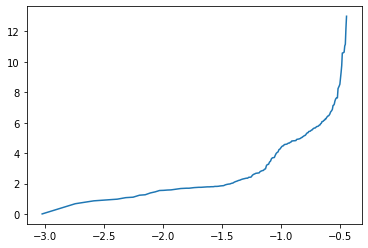

In [311]:
X = stats.probplot(enforce_bans['AvgCigarettePriceDollars'])
plt.plot(X[0][0], X[0][1])

In [319]:
import statsmodels.stats.weightstats as wstat
wstat.ztest(coefficients, value = models['United Kingdom'].coef_)

(array([[13.20563764]]), array([[8.14074273e-40]]))

In [322]:
wstat.ztest(constants, value= models['United States'].intercept_)

(array([3.06874501]), array([0.0021496]))